For the data set in the table below, 
please use the K-Nearest Neighbors algorithm for regression to predict the weights of new samples. 
Please use both the Euclidian and Manhattan distances and make a comparison on the results. 
Please determine the best K value for the data set.
Upload a detail report on how you program the predictor and the running environment of the final program.

# Use IPython - Jupyter Enviorment

# 1. Create Data
use training ID (0~9) to predict target (ID10) when Height = 5.5 , age = 38 , weight = ?

In [1]:
import pandas as pd
d= pd.DataFrame(columns=['Height','age','weight'],
             data=[[5,45,77],
                  [5.11,26,47],
                  [5.6,30,55],
                  [5.9,34,59],
                  [4.8,40,72],
                  [5.8,36,60],
                  [5.3,19,40],
                  [5.8,28,60],
                  [5.5,23,45],
                  [5.6,32,58]])
target = [5.5,38] # Forecast target
d

,Height,age,weight
0,5.00,45,77
1,5.11,26,47
2,5.60,30,55
3,5.90,34,59
4,4.80,40,72
5,5.80,36,60
6,5.30,19,40
7,5.80,28,60
8,5.50,23,45
9,5.60,32,58


# 2. Determine Best K-Values
use GridSearchCV to tune best KNN parameters

In [2]:
X = d[['Height','age']].values
y = d['weight'].values

from sklearn.neighbors import KNeighborsRegressor,kneighbors_graph
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8],
          'weights':['distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
neigh = KNeighborsRegressor()
model = GridSearchCV(neigh, params, cv=5) # Auto-tune parameters
model.fit(X,y)
print("Best KNN params : ")
print(model.best_params_)



Best KNN params : 
{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


# 3. Use manhattan distance
This is the distance between real vectors using the sum of their absolute difference.

ID10 Weight = 64.08472172988301
Score = 1.0


D:\Program\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


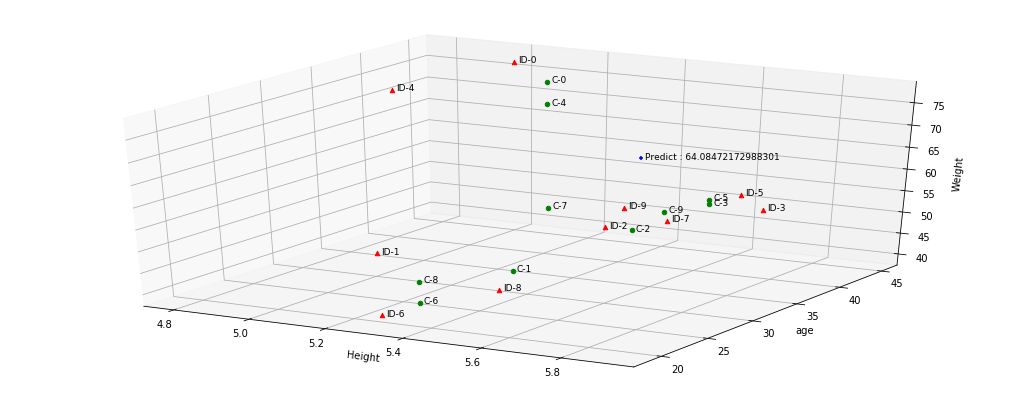

<Figure size 1440x560 with 0 Axes>

In [3]:
neigh.set_params(metric ='manhattan',**model.best_params_)
neigh.fit(X,y) # use manhattan to determine score

distances, indices = neigh.kneighbors(X, return_distance=True)
indices = pd.DataFrame(indices,columns=['Near-Idx1','Near-Idx2','Near-Idx3'])
distances = pd.DataFrame(distances,columns=['Dist-Idx1','Dist-Idx2','Dist-Idx3'])

ans = neigh.predict(target)[0] # predict score
print(f"ID10 Weight = {ans}")
print(f"Score = {neigh.score(X,y)}")

centers=[]
for i,l in enumerate(indices.values): # Find KNN centers (0~9)
    h = (d.Height[l[0]] + d.Height[l[1]]  + d.Height[l[2]]) / 3
    a = (d.age[l[0]] + d.age[l[1]]  + d.age[l[2]]) / 3
    w = (d.weight[l[0]] + d.weight[l[1]]  + d.weight[l[2]]) / 3
    centers.append([h,a,w])
    
#  View the distribution of data sets
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Height')
ax.set_ylabel('age')
ax.set_zlabel('Weight')

plt.figure(figsize=(18,7), dpi=80)

#  Set the frame size
#  Generate dataset scatter plot
for i,coord in enumerate(X):
    ax.scatter(coord[0], coord[1], y[i], c='r', marker='^')
    ax.text(coord[0]+0.01, coord[1]+0.01,y[i]+0.01, "ID-"+str(i), fontsize=9)

#  Draw the center point
for i,coord in enumerate(centers):
    ax.scatter(coord[0], coord[1], y[i], c='g', marker='o')
    ax.text(coord[0]+0.01, coord[1]+0.01,y[i]+0.01, "C-"+str(i), fontsize=9)

#  Draw prediction points
ax.scatter(target[0], target[1], ans,c='b' ,marker='+')
ax.text(target[0]+0.01, target[1]+0.01, ans+0.01,f'Predict : {ans}', fontsize=9)

plt.show()

In [4]:
indices # neighbor index

,Near-Idx1,Near-Idx2,Near-Idx3
0,0,4,5
1,1,7,8
2,2,9,7
3,3,5,9
4,4,5,0
5,5,3,9
6,6,8,1
7,7,2,1
8,8,1,6
9,9,2,3


In [5]:
distances # neighbor index distance

,Dist-Idx1,Dist-Idx2,Dist-Idx3
0,0.0,5.20,9.80
1,0.0,2.69,3.39
2,0.0,2.00,2.20
3,0.0,2.10,2.30
4,0.0,5.00,5.20
5,0.0,2.10,4.20
6,0.0,4.20,7.19
7,0.0,2.20,2.69
8,0.0,3.39,4.20
9,0.0,2.00,2.30


# 4. Use euclidean distance
Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (y).

D:\Program\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ID10 Weight = 64.45571427434993
Score = 1.0


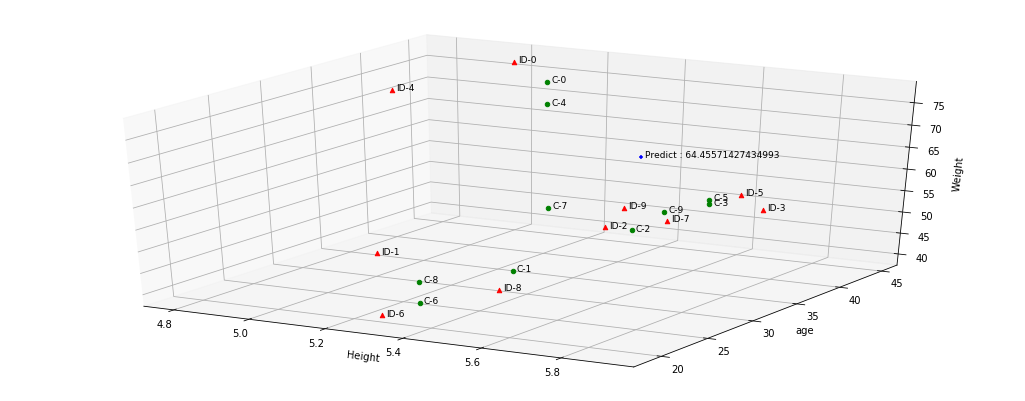

<Figure size 1440x560 with 0 Axes>

In [6]:
neigh.set_params(metric ='euclidean',**model.best_params_)
neigh.fit(X,y) # use euclidean to determine score

distances, indices = neigh.kneighbors(X, return_distance=True)
indices = pd.DataFrame(indices,columns=['Near-Idx1','Near-Idx2','Near-Idx3'])
distances = pd.DataFrame(distances,columns=['Dist-Idx1','Dist-Idx2','Dist-Idx3'])

ans = neigh.predict(target)[0] # predict score
print(f"ID10 Weight = {ans}")
print(f"Score = {neigh.score(X,y)}")

centers=[]
for i,l in enumerate(indices.values): # Find KNN centers (0~9)
    h = (d.Height[l[0]] + d.Height[l[1]]  + d.Height[l[2]]) / 3
    a = (d.age[l[0]] + d.age[l[1]]  + d.age[l[2]]) / 3
    w = (d.weight[l[0]] + d.weight[l[1]]  + d.weight[l[2]]) / 3
    centers.append([h,a,w])
    
#  View the distribution of data sets
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Height')
ax.set_ylabel('age')
ax.set_zlabel('Weight')

plt.figure(figsize=(18,7), dpi=80)

#  Set the frame size
#  Generate dataset scatter plot
for i,coord in enumerate(X):
    ax.scatter(coord[0], coord[1], y[i], c='r', marker='^')
    ax.text(coord[0]+0.01, coord[1]+0.01,y[i]+0.01, "ID-"+str(i), fontsize=9)

#  Draw the center point
for i,coord in enumerate(centers):
    ax.scatter(coord[0], coord[1], y[i], c='g', marker='o')
    ax.text(coord[0]+0.01, coord[1]+0.01,y[i]+0.01, "C-"+str(i), fontsize=9)

#  Draw prediction points
ax.scatter(target[0], target[1], ans,c='b' ,marker='+')
ax.text(target[0]+0.01, target[1]+0.01, ans+0.01,f'Predict : {ans}', fontsize=9)

plt.show()

In [7]:
indices # neighbor index

,Near-Idx1,Near-Idx2,Near-Idx3
0,0,4,5
1,1,7,8
2,2,9,7
3,3,5,9
4,4,5,0
5,5,3,9
6,6,8,1
7,7,2,1
8,8,1,6
9,9,2,3


In [8]:
distances # neighbor index distance

,Dist-Idx1,Dist-Idx2,Dist-Idx3
0,0.0,5.003998,9.035486
1,0.0,2.115680,3.025244
2,0.0,2.000000,2.009975
3,0.0,2.002498,2.022375
4,0.0,4.123106,5.003998
5,0.0,2.002498,4.004997
6,0.0,4.004997,7.002578
7,0.0,2.009975,2.115680
8,0.0,3.025244,4.004997
9,0.0,2.000000,2.022375
